<a href="https://colab.research.google.com/github/mandydonut23/FakeFaceDetector/blob/main/OllamaFineTune3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install unsloth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import unsloth
import os
from unsloth import FastVisionModel
import torch
from datasets import load_dataset
from transformers import TextStreamer
from unsloth import is_bf16_supported
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig
from transformers import AutoProcessor




NotImplementedError: Unsloth: No NVIDIA GPU found? Unsloth currently only supports GPUs!

In [ ]:
from huggingface_hub import login

login()  # This will prompt you to enter your token


In [ ]:
from unsloth import FastVisionModel
from transformers import AutoTokenizer

# Load the BASE model
base_model, tokenizer = FastVisionModel.from_pretrained(
    "unsloth/Llama-3.2-11B-Vision-Instruct",
    load_in_4bit=True,  # Use 4-bit quantization
    use_gradient_checkpointing="unsloth",
)

# Define the path to your saved LoRA model
lora_model = "/content/drive/MyDrive/lora_model"

# Load the fine-tuned LoRA adapters
base_model.load_adapter(lora_model)  # Use variable lora_model

# Load the fine-tuned tokenizer
tokenizer = AutoTokenizer.from_pretrained(lora_model)

# Set model to evaluation mode
base_model.eval()

print(" LoRA fine-tuned model & tokenizer loaded successfully!")


==((====))==  Unsloth 2025.3.18: Fast Mllama patching. Transformers: 4.49.0.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


ValueError: Some modules are dispatched on the CPU or the disk. Make sure you have enough GPU RAM to fit the quantized model. If you want to dispatch the model on the CPU or the disk while keeping these modules in 32-bit, you need to set `llm_int8_enable_fp32_cpu_offload=True` and pass a custom `device_map` to `from_pretrained`. Check https://huggingface.co/docs/transformers/main/en/main_classes/quantization#offload-between-cpu-and-gpu for more details. 

In [ ]:
# 1. Load the model

model, tokenizer = FastVisionModel.from_pretrained(
    "unsloth/Llama-3.2-11B-Vision-Instruct",
    load_in_4bit = True,
    use_gradient_checkpointing = "unsloth",
)

model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers     = True,
    finetune_language_layers   = True,
    finetune_attention_modules = True,
    finetune_mlp_modules      = True,
    r = 16,
    lora_alpha = 16,
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,
    loftq_config = None,
)

Exception ignored in: <function _xla_gc_callback at 0x7ca363a1f920>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


==((====))==  Unsloth 2025.3.18: Fast Mllama patching. Transformers: 4.49.0.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors.index.json:   0%|          | 0.00/375k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.94G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/477 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/55.9k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/5.15k [00:00<?, ?B/s]

Unsloth: Making `model.base_model.model.vision_model.transformer` require gradients


In [ ]:
# Step 2: Extract the dataset

from google.colab import drive
drive.mount('/content/drive')

# Define the path to your tar file
file_path = '/content/drive/MyDrive/ArtiFace.tar.xz'

# Extract the file
!tar -xf {file_path}

!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ArtiFace		drive	     test_updated.csv	unsloth_compiled_cache
converted_dataset.json	sample_data  train_updated.csv


In [ ]:
!ls

ArtiFace		drive	     test_updated.csv	unsloth_compiled_cache
converted_dataset.json	sample_data  train_updated.csv


In [ ]:
import datasets
from datasets import Dataset
import pandas as pd

# Load the CSV file
train_df = pd.read_csv("/content/drive/My Drive/train_updated.csv")
test_df = pd.read_csv("/content/drive/My Drive/test_updated.csv")

Image Path: /content/ArtiFace/Real/FFHQ/FFHQ.46468.jpg
✅ File exists!
✅ Image opened successfully!


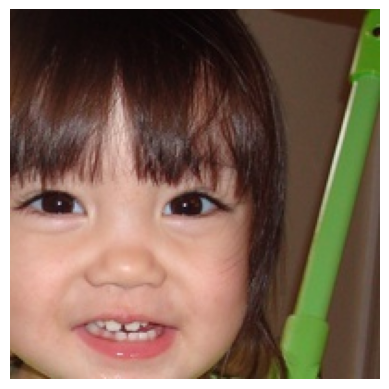

In [ ]:
import os
from PIL import Image

# Get image path
image_path = train_df.iloc[0]["image_path"]

# ✅ Step 1: Print the image path
print(f"Image Path: {image_path}")

# ✅ Step 2: Check if the file exists
if not os.path.exists(image_path):
    print(f"❌ File does NOT exist: {image_path}")
    exit()
else:
    print("✅ File exists!")

# ✅ Step 3: Try opening the image
try:
    image = Image.open(image_path).convert("RGB")
    print("✅ Image opened successfully!")
except Exception as e:
    print(f"❌ Error opening image: {e}")
    exit()

# ✅ Step 4: Display the image (Optional, for debugging)
import matplotlib.pyplot as plt

# Display the image in Colab
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.show()


In [ ]:
# Test
FastVisionModel.for_inference(model)
image_path = train_df.iloc[0]["image_path"]
# image = Image.open(image_path)
instruction = "You are an expert at spotting AI-generated human faces. Describe if this human face is real or genai-generated. Explain what features of the face led you to this classification."

messages = [
    {"role": "user", "content": [
        {"type": "image", "image": image_path},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

print("\nBefore training:\n")

text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)


Before training:

This image appears to be a real photograph of a young child, possibly a toddler, with distinctive features that suggest it is not AI-generated. The following characteristics lead to this conclusion:

1. **Hair**: The child has dark brown, shoulder<|begin_of_text|><|start_header_id|>user<|end_header_id|>

<|image|>You are an expert at spotting AI-generated images. Describe if this image is real or genai-generated. Explain what features of the image led you to this classification.<|eot_id|><|start_header_id|>assistant<|end_header_id|>

Based on visual cues, including the subject's skin texture and the angle of the facial features, it's likely the image was edited to be photogenic. However, some slight inconsistencies can be detected, which could be attributed to the child not smiling or a different angle of view. One of the most compelling features suggesting this may not be authentic is the neon green prop to the right. 

While not conclusive proof on its own, these i

In [ ]:
# # import pandas as pd
# from PIL import Image

# # Instruction prompt (clear but neutral)
# instruction = """You are an expert at spotting AI-generated images.
# Analyze the image and determine if it is real or AI-generated.
# Explain the reasoning behind your decision."""

# # Function to convert a row into a training format
# def convert_to_conversation(row):
#     image_path = row["image_path"]
#     label = "real" if row["label"] == 0 else "AI-generated"  # Convert numeric labels to text

#     image = Image.open(image_path).convert("RGB")  # Ensure correct image format

#     conversation = {
#         "messages": [
#             {
#                 "role": "user",
#                 "content": [
#                     {"type": "image", "image": image},  # Attach image
#                     {"type": "text", "text": instruction}  # Model must infer label
#                 ]
#             },
#             {
#                 "role": "assistant",
#                 "content": [
#                     {"type": "text", "text": f"The image is {label}. Here’s why: <explanation>"}
#                 ]
#             }
#         ]
#     }
#     return conversation

# # Convert dataset
# converted_dataset = [convert_to_conversation(row) for _, row in train_df.iterrows()]


In [ ]:
import pandas as pd
import json

# Instruction prompt
instruction = """You are an expert at spotting AI-generated images.
Analyze the image and determine if it is real or AI-generated.
Explain the reasoning behind your decision."""

# Function to convert a row into Ollama's format
def convert_to_conversation(row):
    image_path = row["image_path"]
    label = "real" if row["label"] == 0 else "AI-generated"  # Convert numeric labels to text

    conversation = {
        "messages": [
            {
                "role": "user",
                "content": [
                    {"type": "image", "image": image_path},
                    {"type": "text", "text": instruction}
                ]
            },
            {
                "role": "assistant",
                "content": [
                    {"type": "text", "text": f"The image is {label}.
                    Here’s why: <explanation>"}
                ]
            }
        ]
    }
    return conversation

# Convert dataset (avoid loading all images into memory at once)
converted_dataset = [convert_to_conversation(row) for _, row in train_df.iterrows()]

# Save as JSON
with open("converted_dataset.json", "w") as f:
    json.dump(converted_dataset, f, indent=4)

In [ ]:
import json

# Load JSON file
with open("converted_dataset.json", "r") as f:
    loaded_dataset = json.load(f)

In [ ]:
# # Convert the dataset into conversations to train ollama.
# instruction = """You are an expert at spotting AI-generated images. Describe if this image is real or genai-generated.
# Explain what features of the image led you to this classification."""

# def convert_to_conversation(sample):
#     conversation = [
#         { "role": "user",
#           "content" : [
#             {"type" : "text",  "text"  : instruction},
#             {"type" : "image", "image" : sample["image"]} ]
#         },
#         { "role" : "assistant",
#           "content" : [
#             {"type" : "text",  "text"  : sample["explanation"]} ]
#         },
#     ]
#     return { "messages" : conversation }
# pass

# converted_dataset = [convert_to_conversation(sample) for sample in train_df]

In [ ]:
# Step 3: Train the model

FastVisionModel.for_training(model)

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = UnslothVisionDataCollator(model, tokenizer),
    train_dataset = loaded_dataset,
    args = SFTConfig(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 30,
        learning_rate = 2e-4,
        fp16 = not is_bf16_supported(),
        bf16 = is_bf16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none",
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        dataset_num_proc = 4,
        max_seq_length = 2048,
    ),
)

gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)

print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

trainer_stats = trainer.train()

used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory         /max_memory*100, 3)
lora_percentage = round(used_memory_for_lora/max_memory*100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training.")
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")


GPU = Tesla T4. Max memory = 14.741 GB.
9.197 GB of memory reserved.


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 8,000 | Num Epochs = 1 | Total steps = 30
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 67,174,400/11,000,000,000 (0.61% trained)


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
1,3.326700
2,3.286800
3,3.005400
4,2.197300
5,1.710700
6,1.309800
7,0.814100
8,0.514600
9,0.275200
10,0.159400


2332.9753 seconds used for training.
38.88 minutes used for training.
Peak reserved memory = 10.807 GB.
Peak reserved memory for training = 1.61 GB.
Peak reserved memory % of max memory = 73.313 %.
Peak reserved memory for training % of max memory = 10.922 %.


In [ ]:
# Step 4: Save the model

model.save_pretrained("lora_model")
tokenizer.save_pretrained("lora_model")

[]

In [ ]:
# Try to load the model with lora weights

# Define model again
model, tokenizer = FastVisionModel.from_pretrained(
    "unsloth/Llama-3.2-11B-Vision-Instruct",
    load_in_4bit=True,
    use_gradient_checkpointing="unsloth",
)

# Add lora weights
from peft import PeftModel

model = PeftModel.from_pretrained(model, "lora_model")

# View structure
print(model)

==((====))==  Unsloth 2025.3.18: Fast Mllama patching. Transformers: 4.49.0.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


ValueError: Some modules are dispatched on the CPU or the disk. Make sure you have enough GPU RAM to fit the quantized model. If you want to dispatch the model on the CPU or the disk while keeping these modules in 32-bit, you need to set `llm_int8_enable_fp32_cpu_offload=True` and pass a custom `device_map` to `from_pretrained`. Check https://huggingface.co/docs/transformers/main/en/main_classes/quantization#offload-between-cpu-and-gpu for more details. 

In [ ]:
# Step 5: After training

print("\nAfter training:\n")
FastVisionModel.for_inference(model)
image_path = train_df.iloc[0]["image_path"]
instruction = """You are an expert at spotting AI-generated images.
Analyze the image and determine if it is real or AI-generated.
Explain the reasoning behind your decision."""

messages = [
    {"role": "user", "content": [
        {"type": "image", "image": image_path},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)


After training:

The image is AI-generated. Here’s why: <explanation><|eot_id|>


In [ ]:
# Step 5: After training

print("\nAfter training:\n")
FastVisionModel.for_inference(model)
image_path = train_df.iloc[0]["image_path"]
instruction = """You are an expert at spotting AI-generated images.
Analyze the image and determine if it is real or AI-generated.
Give a reason for your decision in detail based on facial features."""

messages = [
    {"role": "user", "content": [
        {"type": "image", "image": image_path},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)


After training:

The image is AI-generated. Here’s why: <explanation><|eot_id|>
